# 🌿 TCMP-300 Medicinal Plant Dataset Analysis
### Author: Karen Ayetiwa

This notebook explores the **Traditional Chinese Medicinal Plant (TCMP-300)** dataset,  
a comprehensive image dataset containing 300 species commonly used in Chinese medicine.  

**Goal:**  
To understand the dataset’s composition, species, families, and image distribution,  
and discuss its relevance for *AI-based plant recognition and pharmacognosy research*.


## Background

Accurate identification of medicinal plants is critical for quality control, drug discovery,  
and ethnobotanical studies. Manual identification can be time-consuming and error-prone.  

The **TCMP-300 dataset** supports computer vision models for plant recognition,  
helping automate this process and improve access to verified medicinal resources.


## Data Description

**Source:**  
Nature Scientific Data (2025) — *"TCMP-300: A Comprehensive Traditional Chinese Medicinal Plant Dataset for Plant Recognition"*  
[Dataset DOI](https://doi.org/10.6084/m9.figshare.29432726)

**Key Columns:**
- `latin_name`: scientific name of the species  
- `family`: plant family classification  
- `chinese_name`: traditional Chinese name  
- `train_num`, `val_num`, `total_num`: image counts for model training, validation, and total samples


In [1]:
import pandas as pd

df = pd.read_csv("tcmp-info-20250329.csv")
df.head()


,No,Latin Name,Family,Chinese Name,Train Num,Val Num,Total Num
0,1,Veronica persica Poir.,Scrophulariaceae,阿拉伯婆婆纳,247,107,354
1,2,Lysimachia clethroides Duby,Primulaceae,矮桃,148,64,212
2,3,Alangium chinense (Lour.) Harms,Alangiaceae,八角枫,172,75,247
3,4,Smilax china L.,Liliaceae,菝葜,158,69,227
4,5,Datura metel L.,Solanaceae,白花曼陀罗,184,79,263


## Data Cleaning and Inspection

- Loaded the metadata CSV and reviewed column names  
- Checked for missing or duplicated values  
- Verified numerical columns (`train_num`, `val_num`, `total_num`)  
- Standardized text fields for consistency


In [2]:
df.columns


Index(['No', 'Latin Name', 'Family', 'Chinese Name', 'Train Num', 'Val Num',
       'Total Num'],
      dtype='object')

In [20]:
df.info()
df.isnull().sum()
df.describe()
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   no            300 non-null    int64 
 1   latin_name    300 non-null    object
 2   family        300 non-null    object
 3   chinese_name  300 non-null    object
 4   train_num     300 non-null    int64 
 5   val_num       300 non-null    int64 
 6   total_num     300 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 16.5+ KB


,no,latin_name,family,chinese_name,train_num,val_num,total_num
0,1,Veronica persica Poir.,Scrophulariaceae,阿拉伯婆婆纳,247,107,354
1,2,Lysimachia clethroides Duby,Primulaceae,矮桃,148,64,212
2,3,Alangium chinense (Lour.) Harms,Alangiaceae,八角枫,172,75,247


## Exploratory Data Analysis

In this section, we explore the dataset to understand:
- which families are most represented,  
- how many images are available per class, and  
- how species distribution might influence AI model balance.


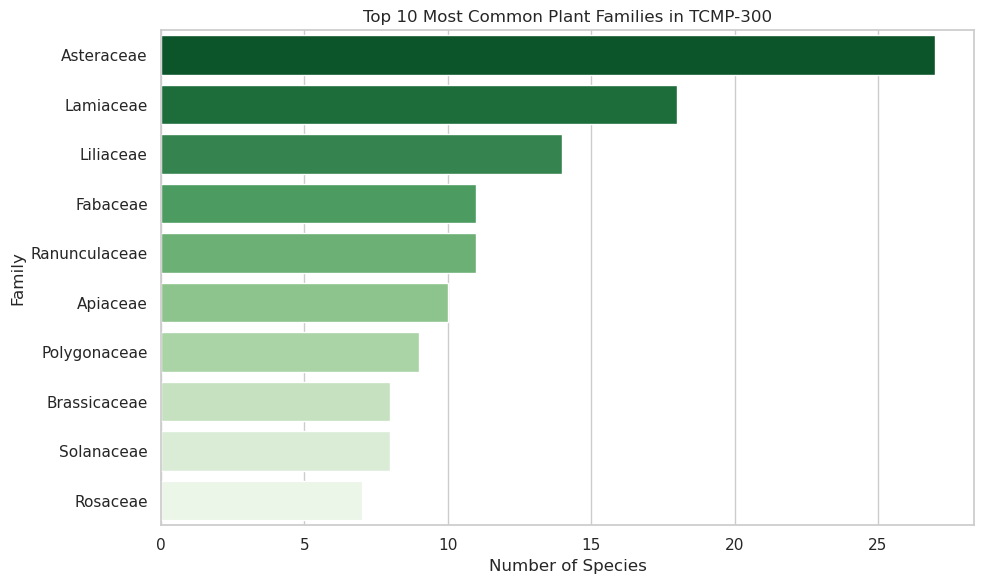

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

top_families = df['family'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_families.values, y=top_families.index, palette="Greens_r")
plt.title("Top 10 Most Common Plant Families in TCMP-300")
plt.xlabel("Number of Species")
plt.ylabel("Family")
plt.tight_layout()
plt.show()


### Top 10 Plant Families
This plot shows which plant families occur most frequently in the dataset.
**Observation:** The Asteraceae and Lamiaceae families dominate the dataset,  
representing over 20% of total species — consistent with their prevalence in herbal medicine.


### 📈 Distribution of Total Images per Species  

We examine the number of images available for each species class.


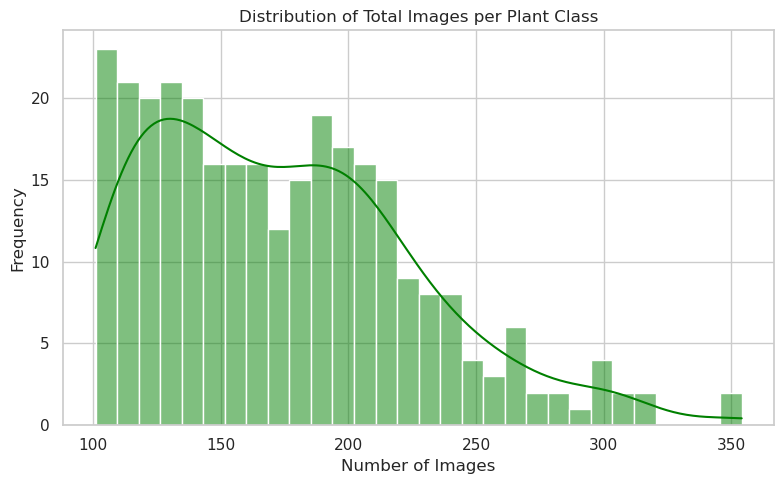

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_num'], bins=30, kde=True, color='green')
plt.title("Distribution of Total Images per Plant Class")
plt.xlabel("Number of Images")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**Observation:**  
Most species have fewer than 200 images, but a few are heavily represented, which may affect model balance.


### 🌸 Top 10 Species by Image Count  


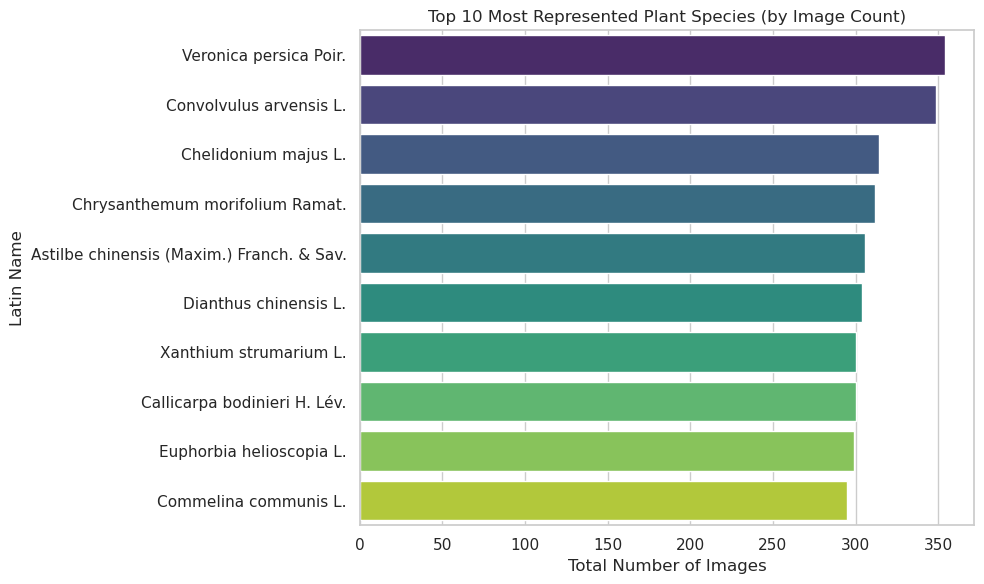

In [22]:
top_species = df.nlargest(10, 'total_num')[['latin_name', 'total_num']]

plt.figure(figsize=(10,6))
sns.barplot(data=top_species, x='total_num', y='latin_name', palette='viridis')
plt.title("Top 10 Most Represented Plant Species (by Image Count)")
plt.xlabel("Total Number of Images")
plt.ylabel("Latin Name")
plt.tight_layout()
plt.show()


**Observation:**  
The dataset’s top species provide abundant training data for deep-learning models.


### 🧩 Summary of TCMP-300 Dataset Insights

- The dataset includes **300 species** across various plant families used in Traditional Chinese Medicine.  
- The most common families are **Asteraceae**, **Lamiaceae**, and **Fabaceae**.  
- The average number of images per species is around `df['total_num'].mean():.0f`, with some species highly represented for training image-recognition models.  
- This dataset provides strong potential for **machine learning in plant identification** and **AI-driven herbal research.**


## 🧠 Discussion  

The TCMP-300 dataset connects ethnobotanical knowledge with computational biology.  
Its annotated images enable:  
- Automated species classification via deep learning  
- Integration with compound and bioactivity databases  
- Improved reproducibility in pharmacognosy research


## 🚀 Conclusion and Next Steps  

This analysis provides an overview of TCMP-300’s structure and potential for biomedical applications.  

**Next Steps:**  
- Combine plant metadata with phytochemical data (PubChem, TCMID).  
- Build a CNN classifier using sample images.  
- Investigate correlations between families and medicinal properties.


## References
- Yang et al., 2025. *TCMP-300: A Comprehensive Traditional Chinese Medicinal Plant Dataset for Plant Recognition*. Nature Scientific Data.  
- https://doi.org/10.6084/m9.figshare.29432726
